## Importing necessary libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Data manipulation

In [159]:
data = pd.read_csv('all_ticks_wide.csv')
df = pd.DataFrame(data)

In [160]:
# check if df has any null values
df.isnull().values.any()
# check which columns have null values
df.isnull().sum()

timestamp       0
AEFES        1881
AKBNK         803
AKSA         1418
AKSEN        1841
             ... 
VESTL        1231
YATAS        3957
YKBNK         787
YUNSA        4484
ZOREN        1205
Length: 61, dtype: int64

### Selecting stocks

In [161]:
df_selected = df[['timestamp', 'AKBNK', 'ARCLK', 'BANVT', 'CCOLA', 'EREGL', 'MGROS', 'SISE', 'TCELL', 'THYAO', 'TUPRS']]
df_selected

,timestamp,AKBNK,ARCLK,BANVT,CCOLA,EREGL,MGROS,SISE,TCELL,THYAO,TUPRS
0,2012-09-17T06:45:00Z,5.2084,6.9909,3.95,27.2590,0.7914,19.60,0.9932,4.5359,3.3661,29.8072
1,2012-09-17T07:00:00Z,5.1938,6.9259,3.96,27.3471,0.7844,19.35,0.9897,4.5153,3.3574,29.7393
2,2012-09-17T07:15:00Z,5.2084,6.9909,3.96,27.3471,0.7914,19.40,0.9932,4.5153,3.3661,29.6716
3,2012-09-17T07:30:00Z,5.1938,6.9584,3.95,27.4347,0.7914,19.45,0.9897,4.5359,3.3748,29.7393
4,2012-09-17T07:45:00Z,5.2084,6.9909,3.96,27.4347,0.7914,19.40,0.9970,4.5153,3.3748,29.8072
...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23T14:00:00Z,7.7300,20.3000,16.04,33.8000,7.6900,15.27,NaN,13.4500,13.0600,131.6000
50008,2019-07-23T14:15:00Z,7.7200,20.3200,15.89,33.5800,7.6500,15.28,NaN,13.4300,13.0600,131.5000
50009,2019-07-23T14:30:00Z,7.7400,20.3400,15.95,33.8000,7.6700,15.26,NaN,13.4600,13.0700,131.5000
50010,2019-07-23T14:45:00Z,7.7000,20.3800,16.03,33.5200,7.6700,15.25,NaN,13.4300,13.0500,131.3000


### Clustering data by months

In [162]:
# make timestamp dtype datetime
df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])
df_selected['MONTH'] = df_selected['timestamp'].dt.strftime('%Y-%m')

In [163]:
# make timestamp column first and MONTH column as second column
cols = ['timestamp', 'MONTH', 'AKBNK', 'ARCLK', 'BANVT', 'CCOLA', 'EREGL', 'MGROS',
       'SISE', 'TCELL', 'THYAO', 'TUPRS']
df_selected = df_selected[cols]

In [164]:
df_selected

,timestamp,MONTH,AKBNK,ARCLK,BANVT,CCOLA,EREGL,MGROS,SISE,TCELL,THYAO,TUPRS
0,2012-09-17 06:45:00+00:00,2012-09,5.2084,6.9909,3.95,27.2590,0.7914,19.60,0.9932,4.5359,3.3661,29.8072
1,2012-09-17 07:00:00+00:00,2012-09,5.1938,6.9259,3.96,27.3471,0.7844,19.35,0.9897,4.5153,3.3574,29.7393
2,2012-09-17 07:15:00+00:00,2012-09,5.2084,6.9909,3.96,27.3471,0.7914,19.40,0.9932,4.5153,3.3661,29.6716
3,2012-09-17 07:30:00+00:00,2012-09,5.1938,6.9584,3.95,27.4347,0.7914,19.45,0.9897,4.5359,3.3748,29.7393
4,2012-09-17 07:45:00+00:00,2012-09,5.2084,6.9909,3.96,27.4347,0.7914,19.40,0.9970,4.5153,3.3748,29.8072
...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23 14:00:00+00:00,2019-07,7.7300,20.3000,16.04,33.8000,7.6900,15.27,NaN,13.4500,13.0600,131.6000
50008,2019-07-23 14:15:00+00:00,2019-07,7.7200,20.3200,15.89,33.5800,7.6500,15.28,NaN,13.4300,13.0600,131.5000
50009,2019-07-23 14:30:00+00:00,2019-07,7.7400,20.3400,15.95,33.8000,7.6700,15.26,NaN,13.4600,13.0700,131.5000
50010,2019-07-23 14:45:00+00:00,2019-07,7.7000,20.3800,16.03,33.5200,7.6700,15.25,NaN,13.4300,13.0500,131.3000


## Boxplots of each stock seperately considering monthly historical clustering

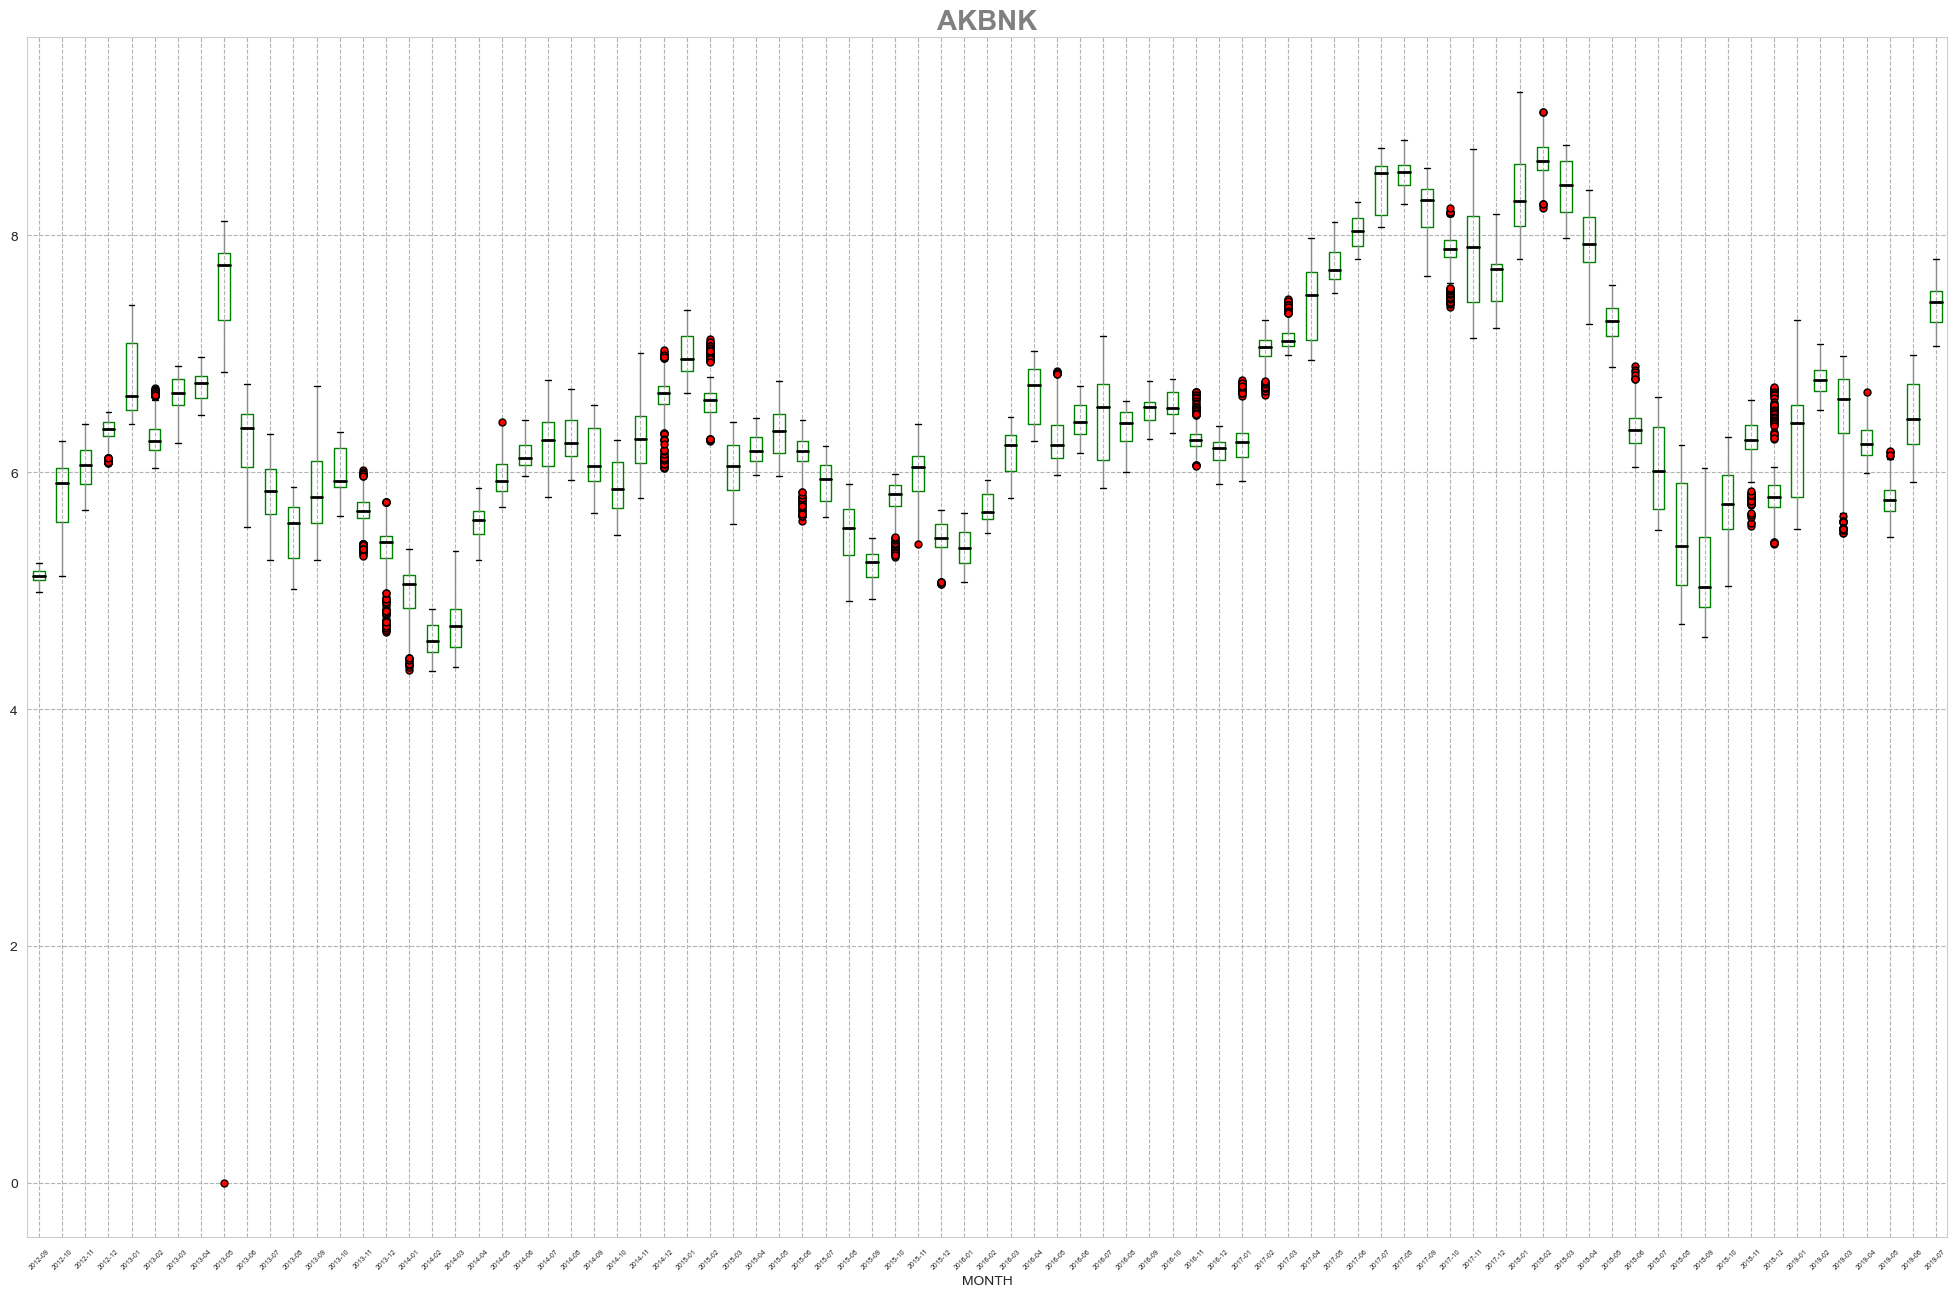

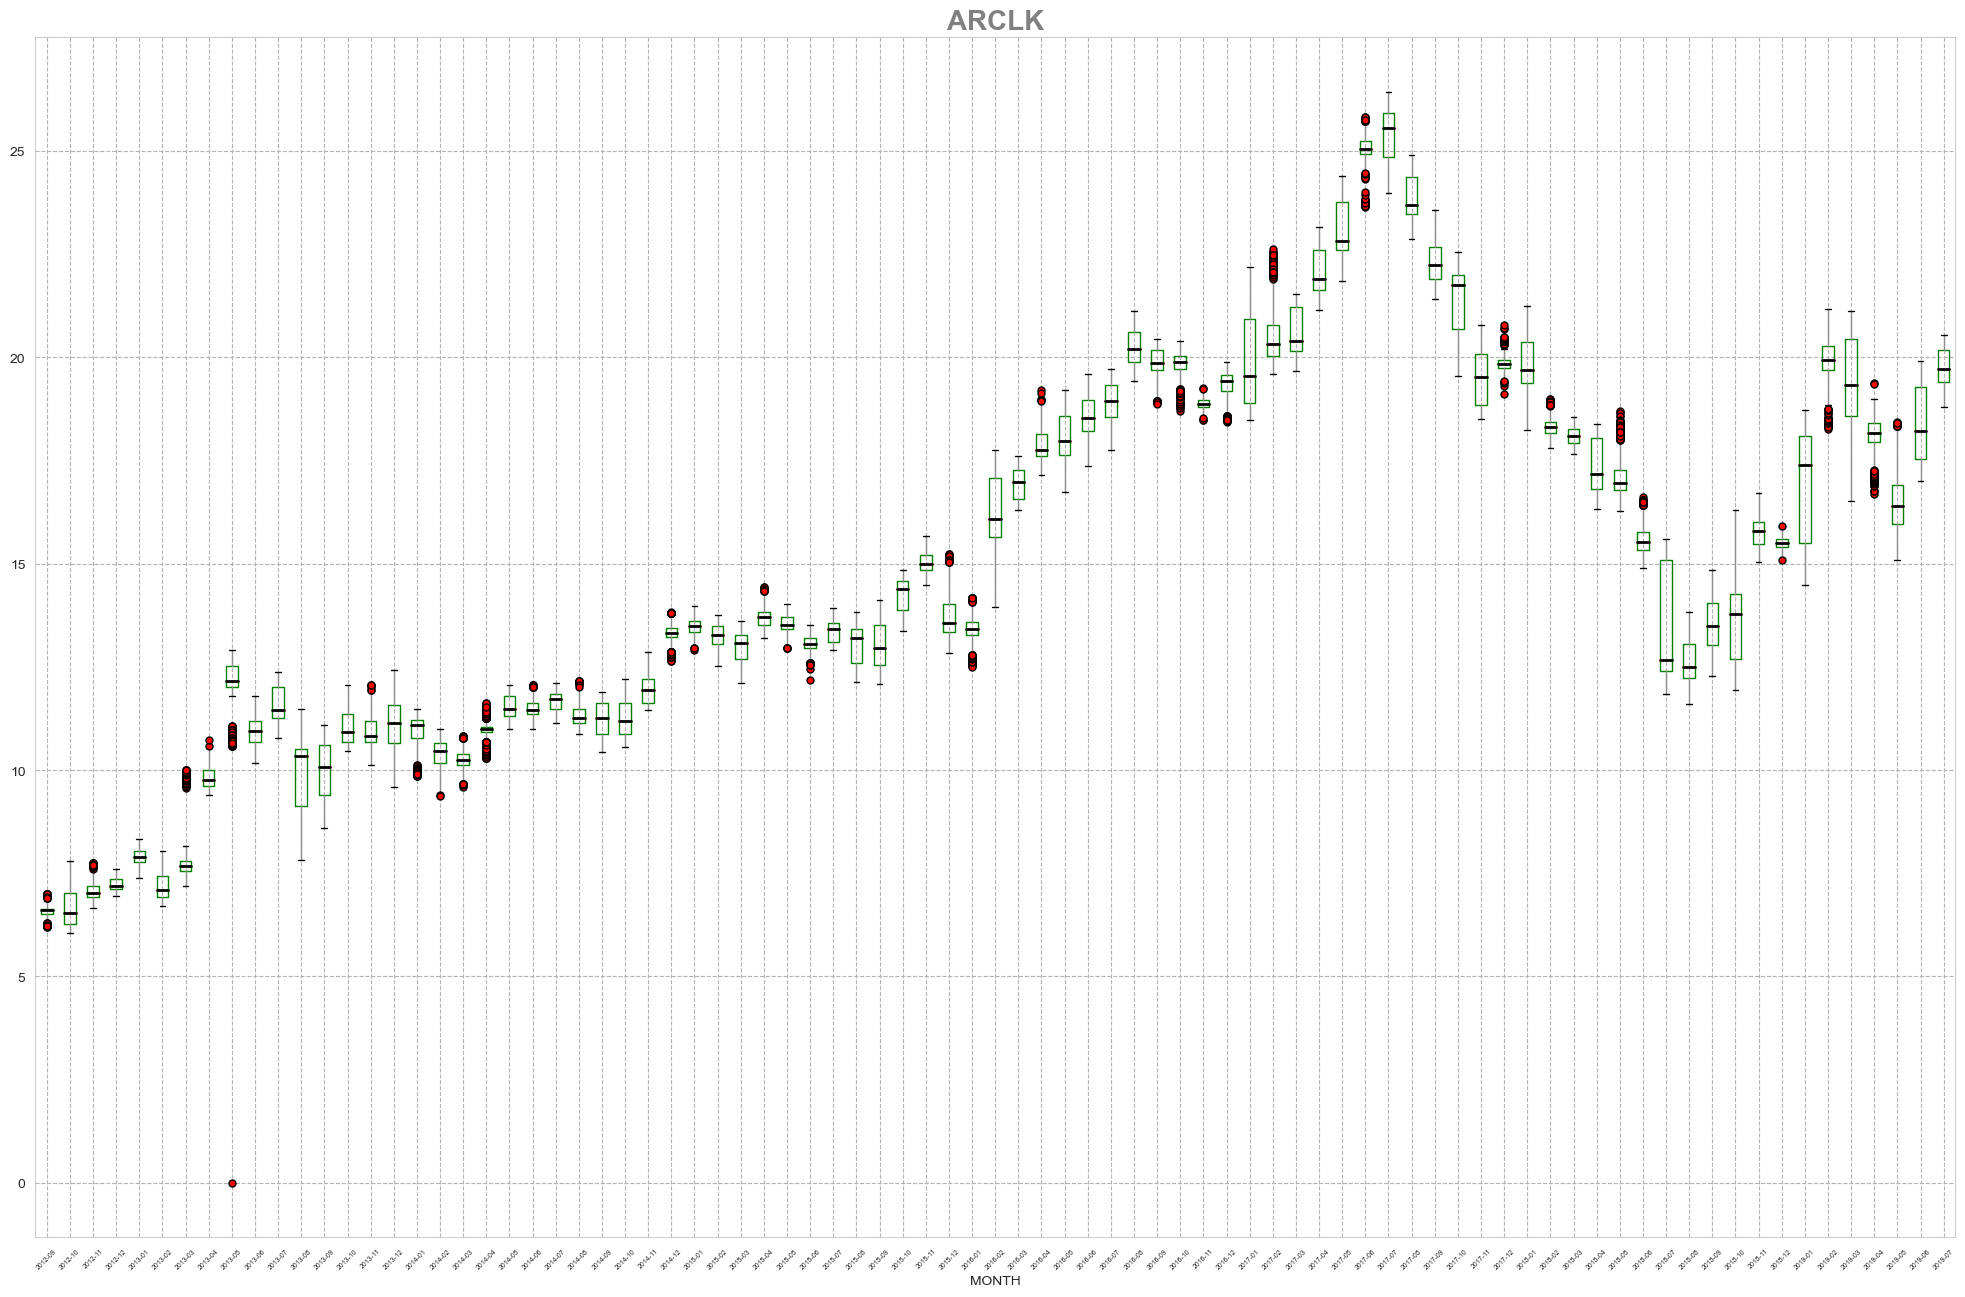

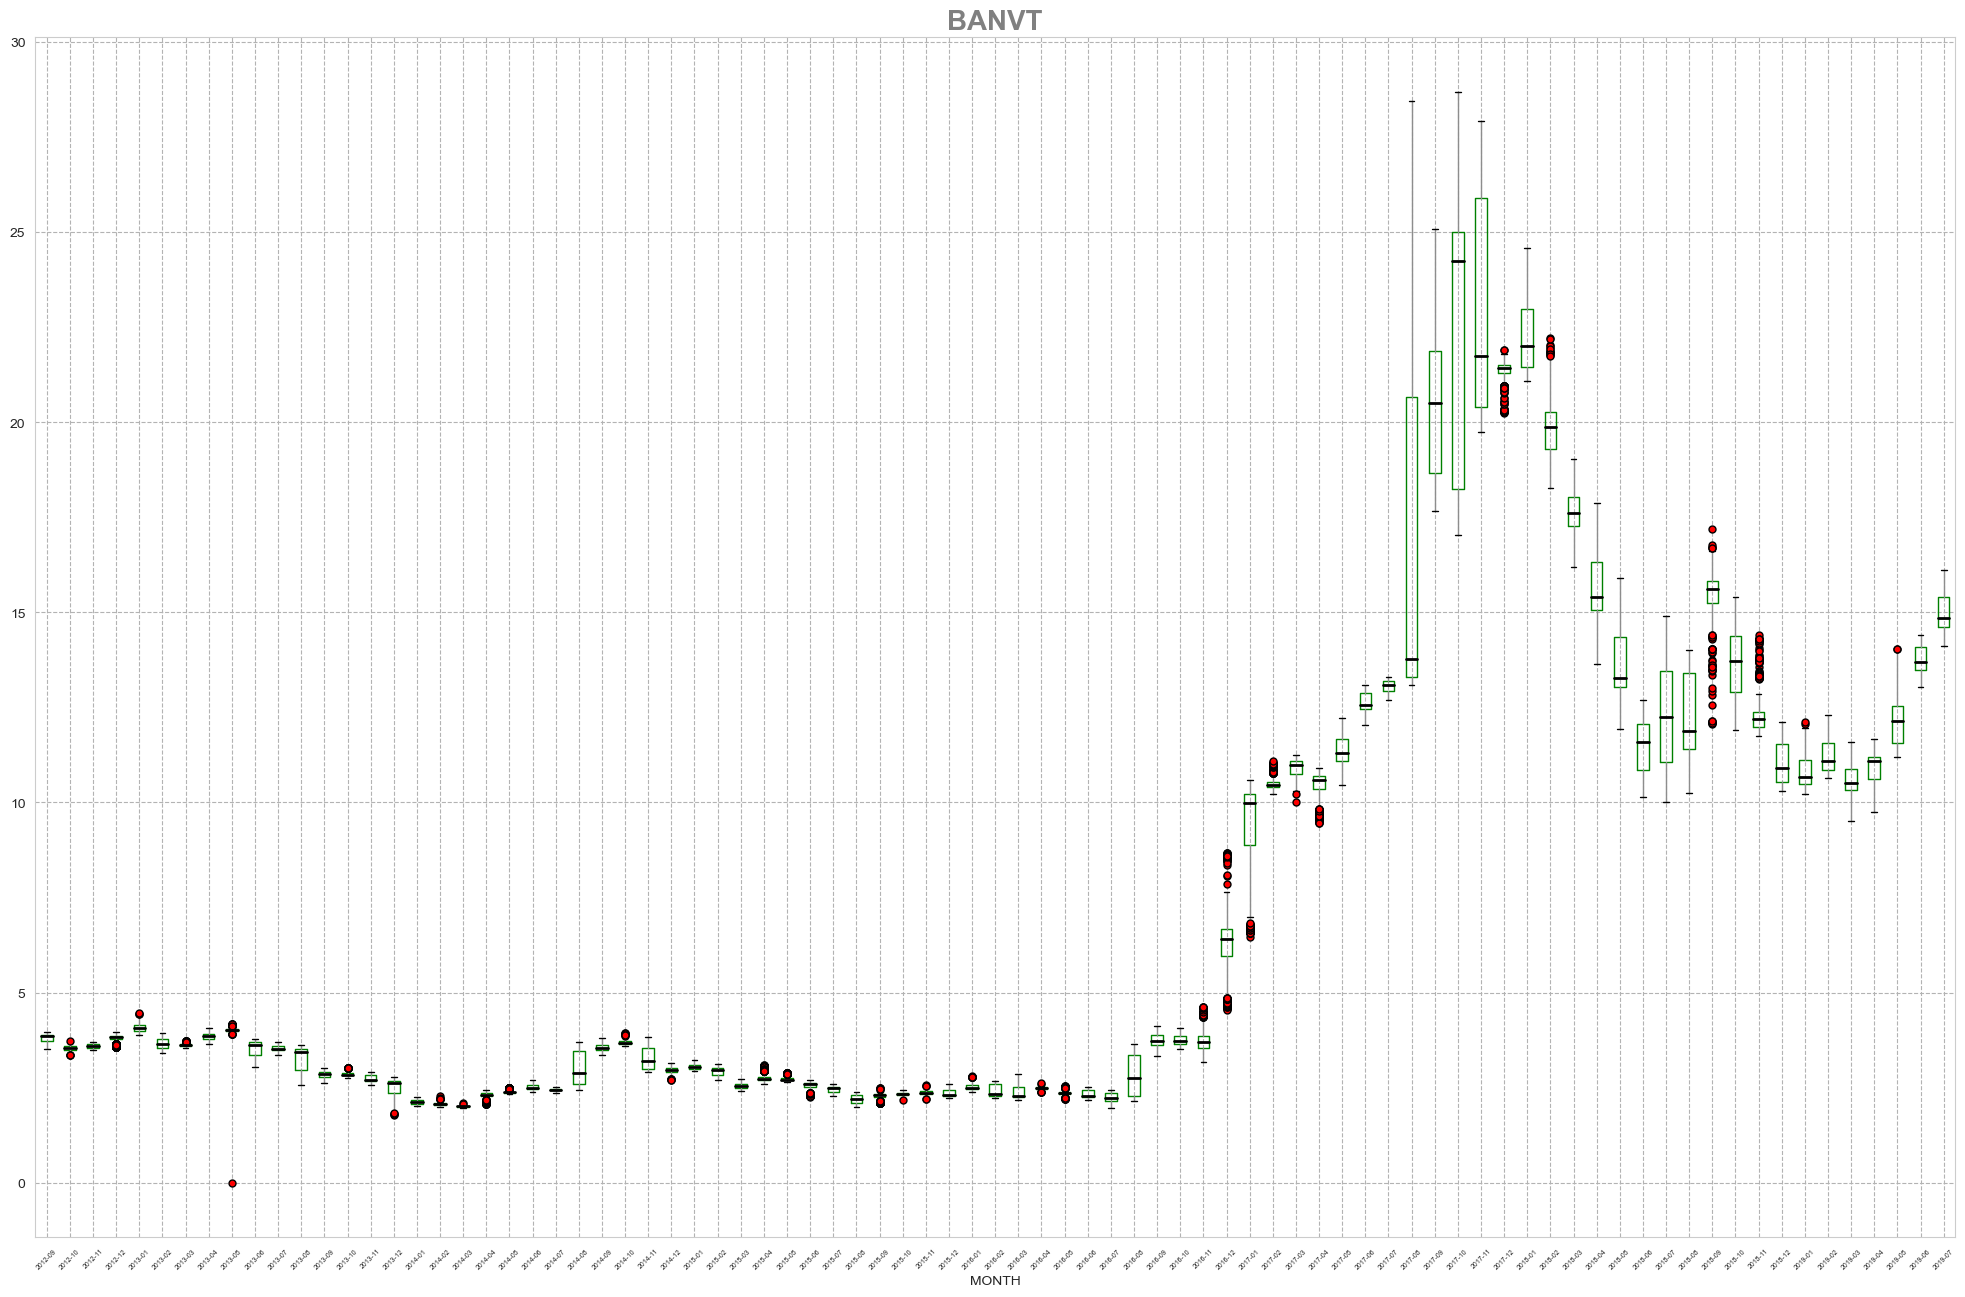

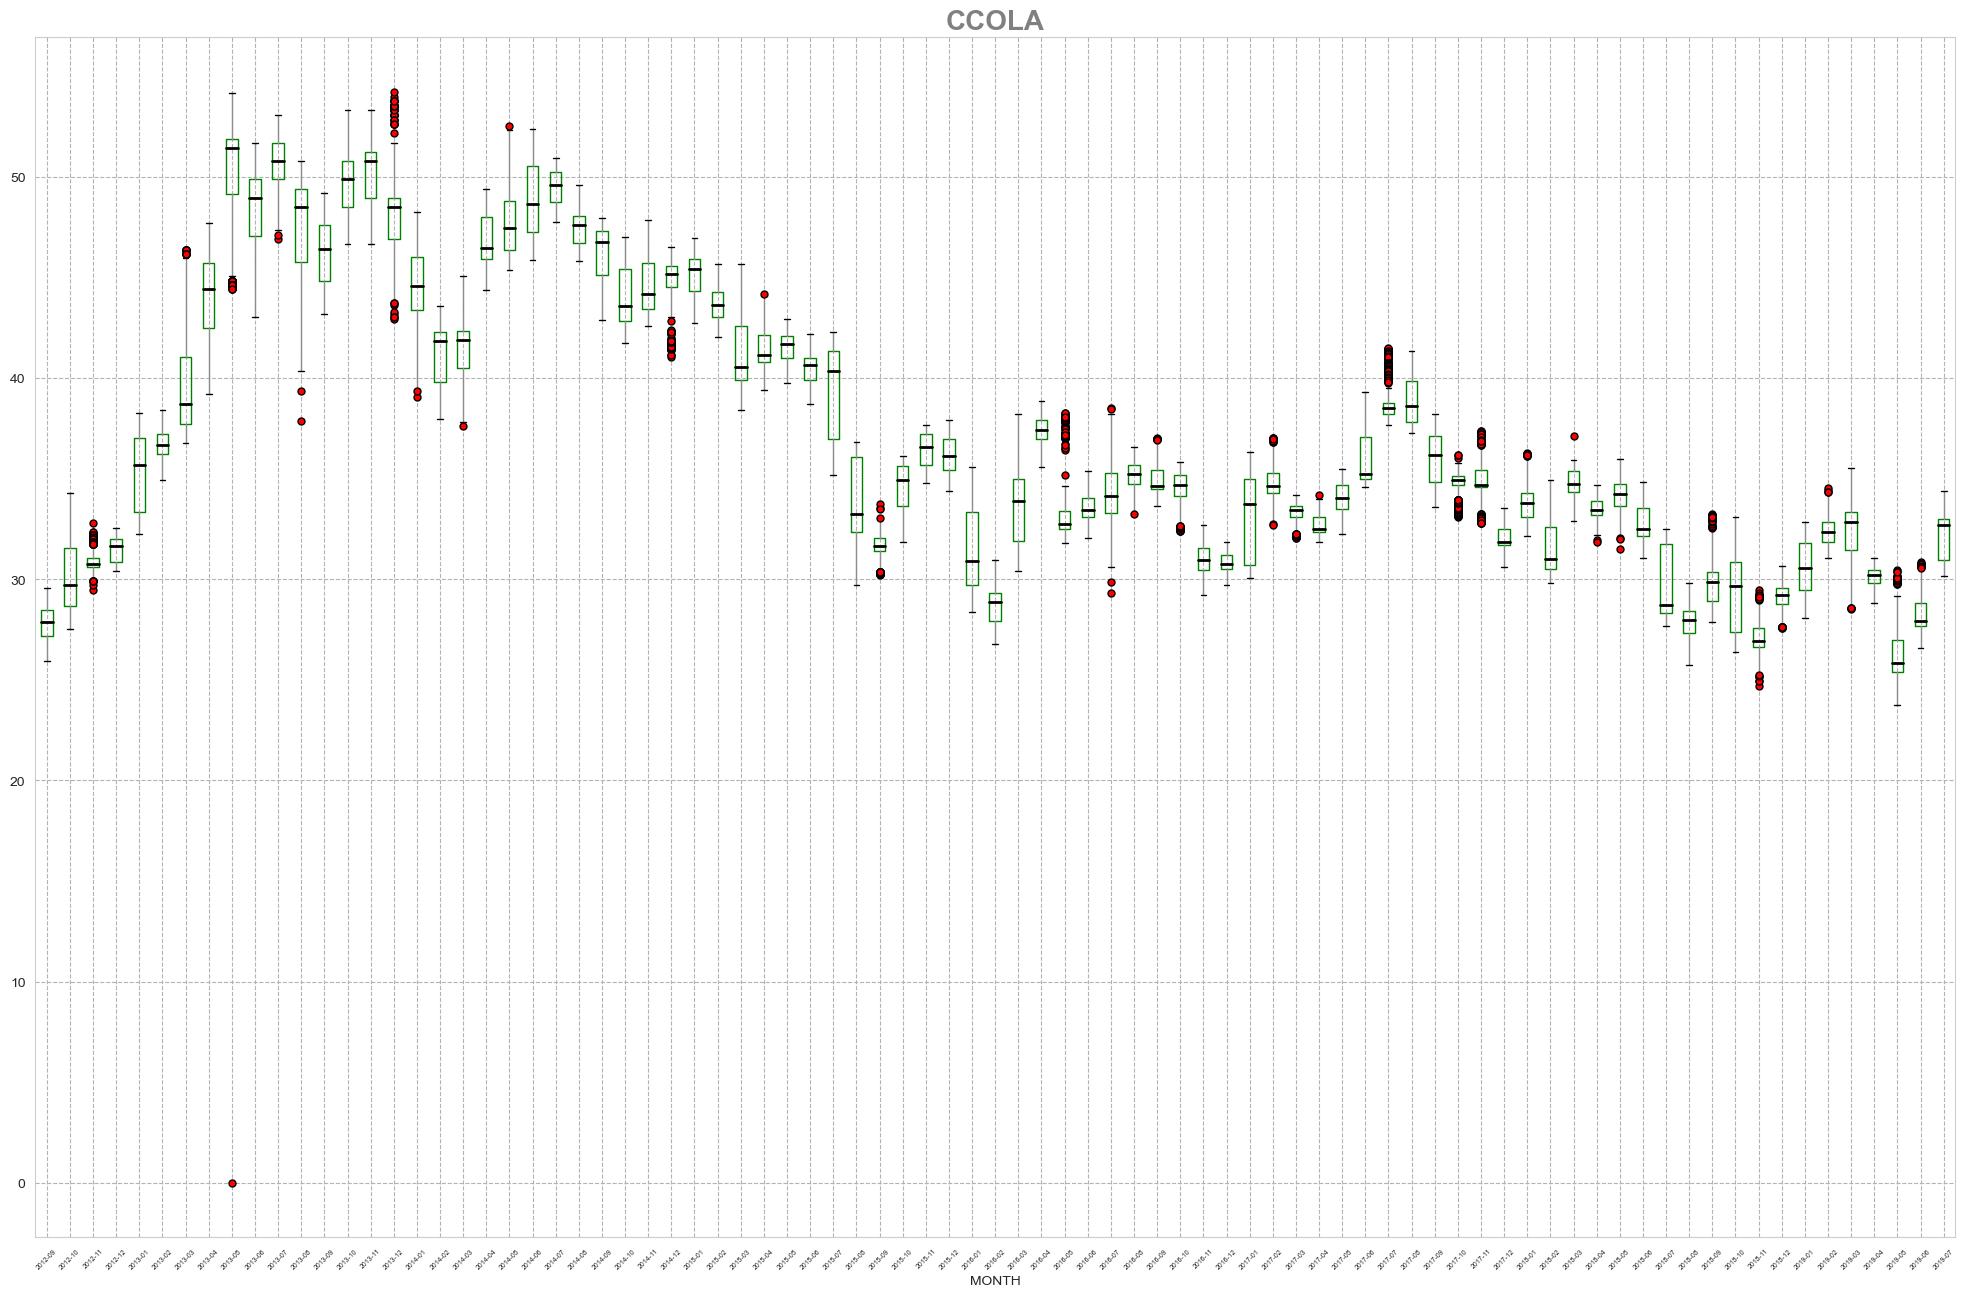

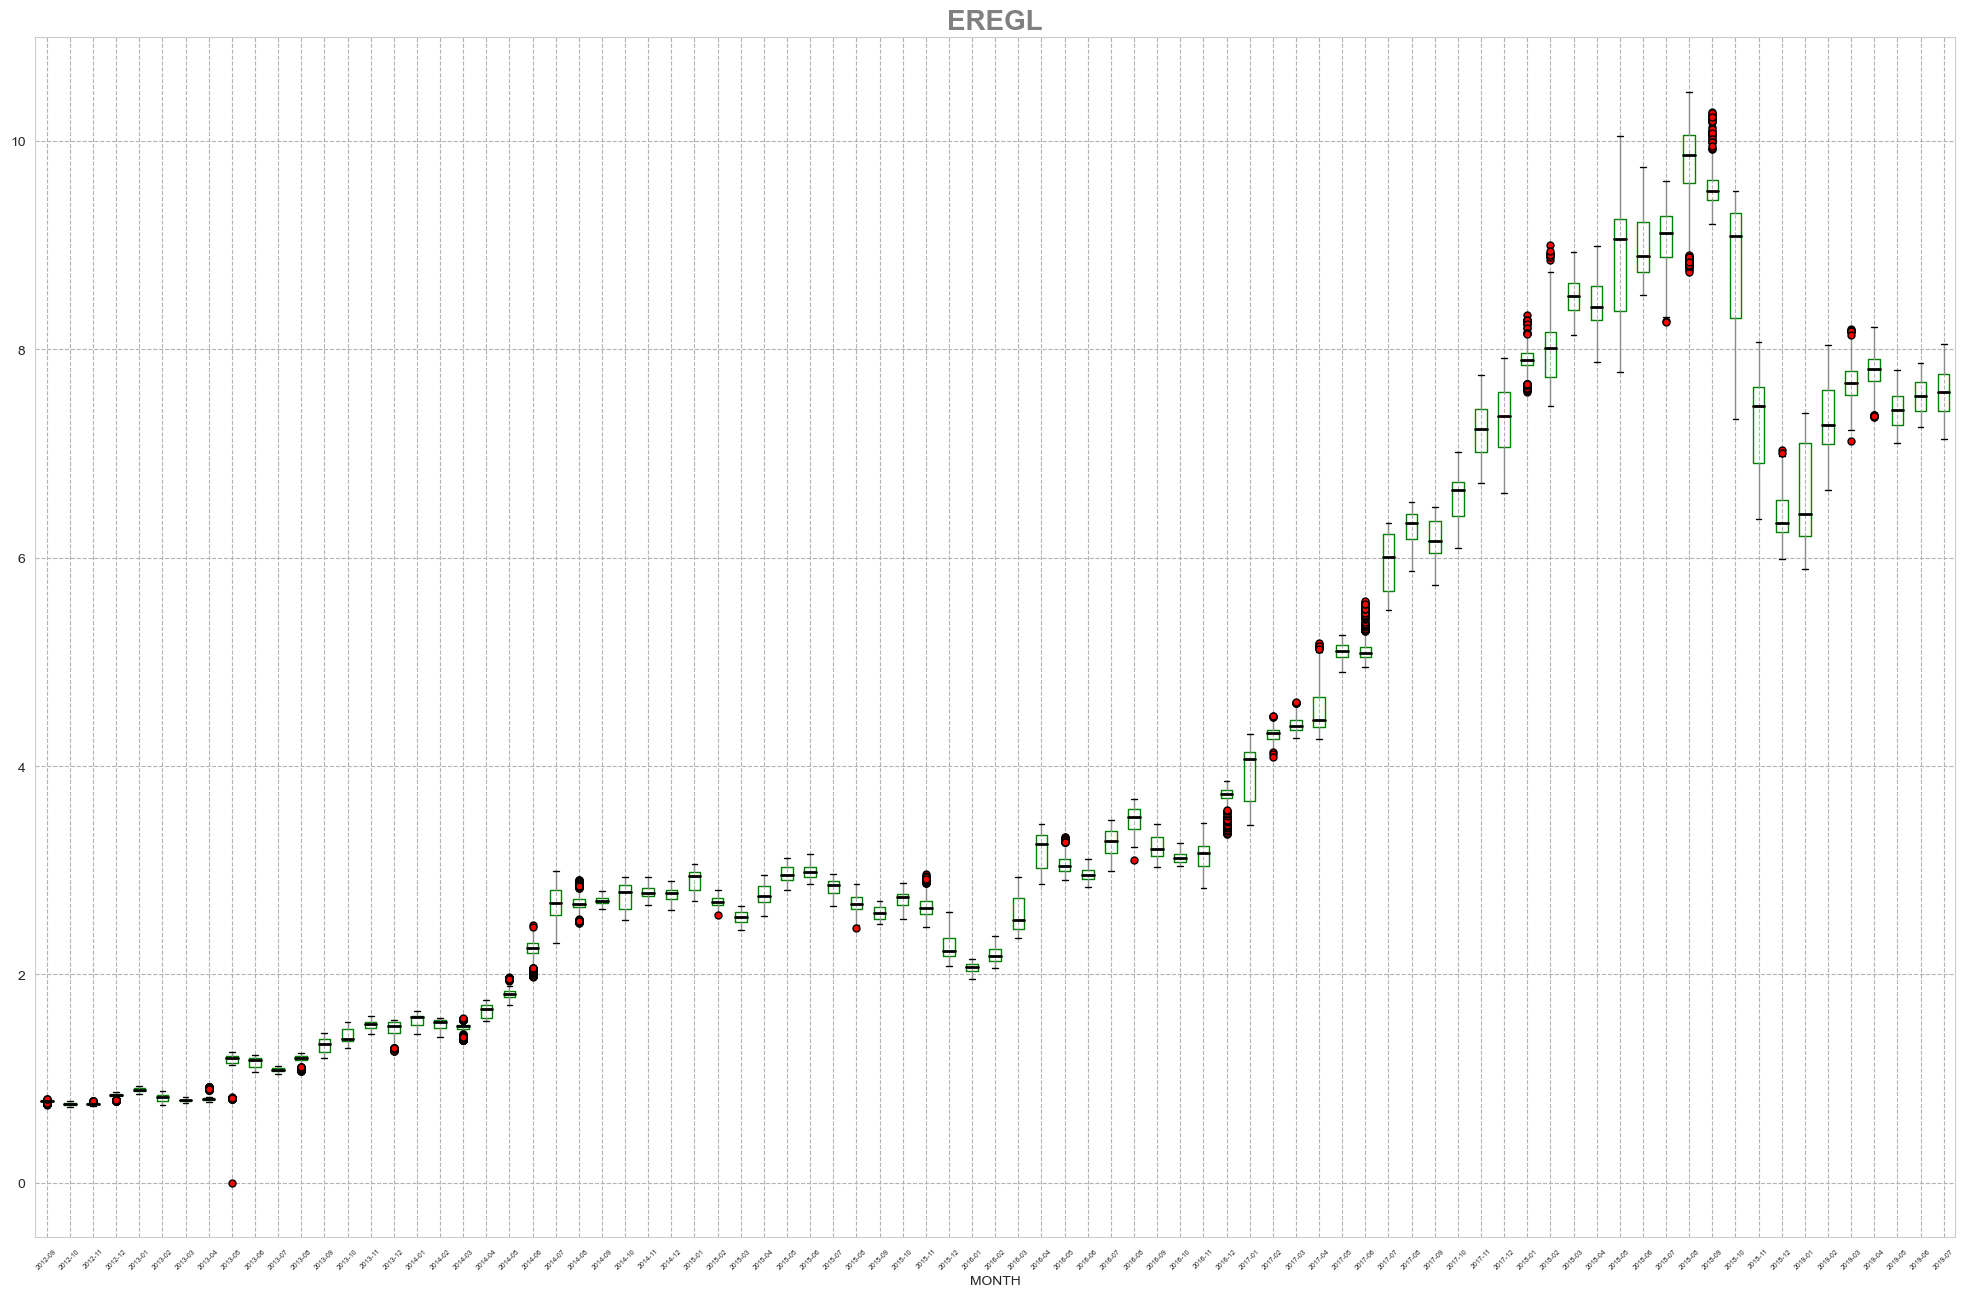

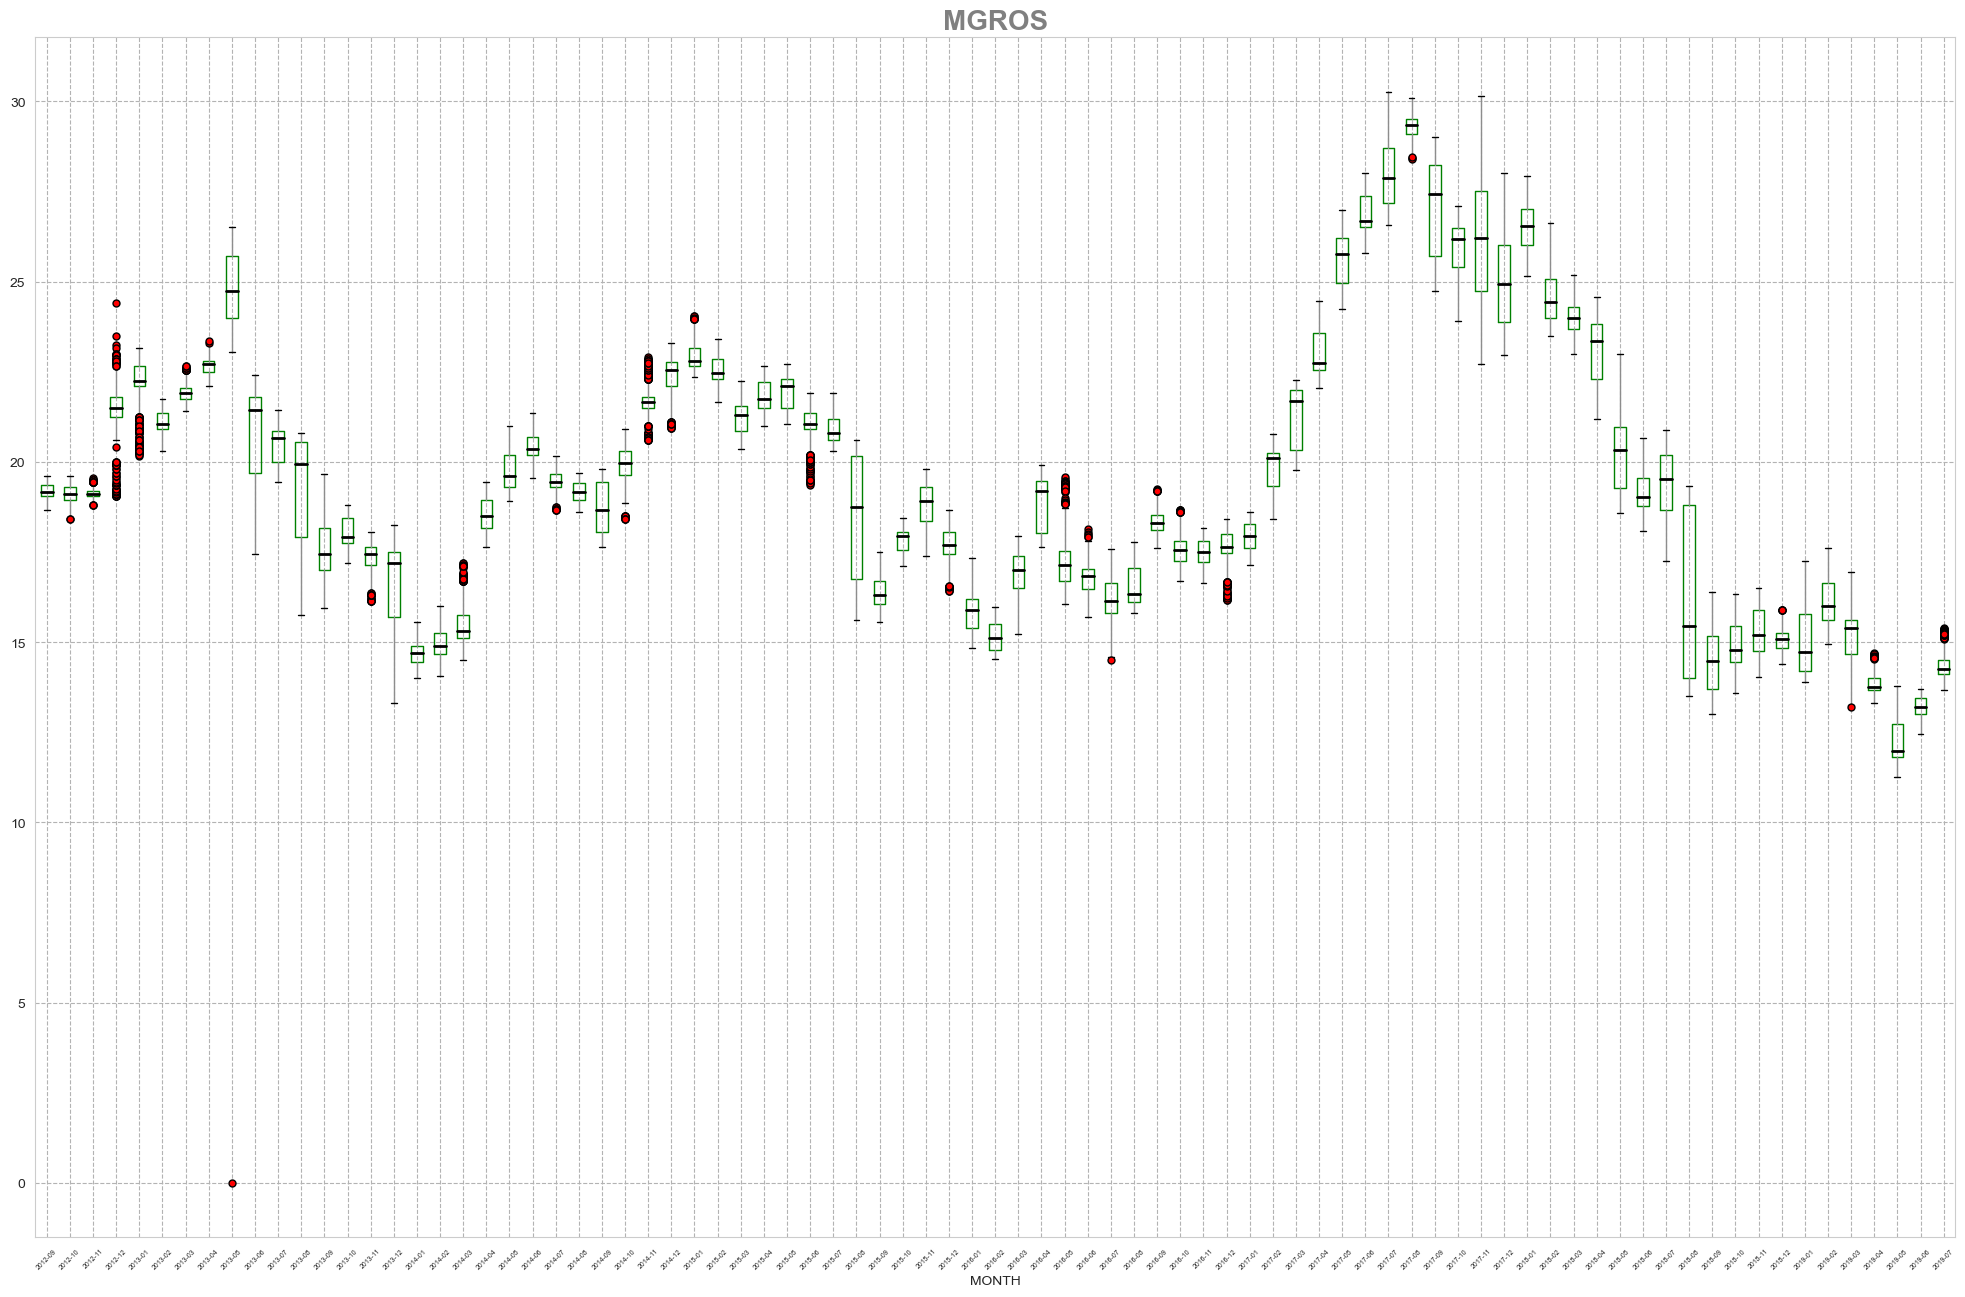

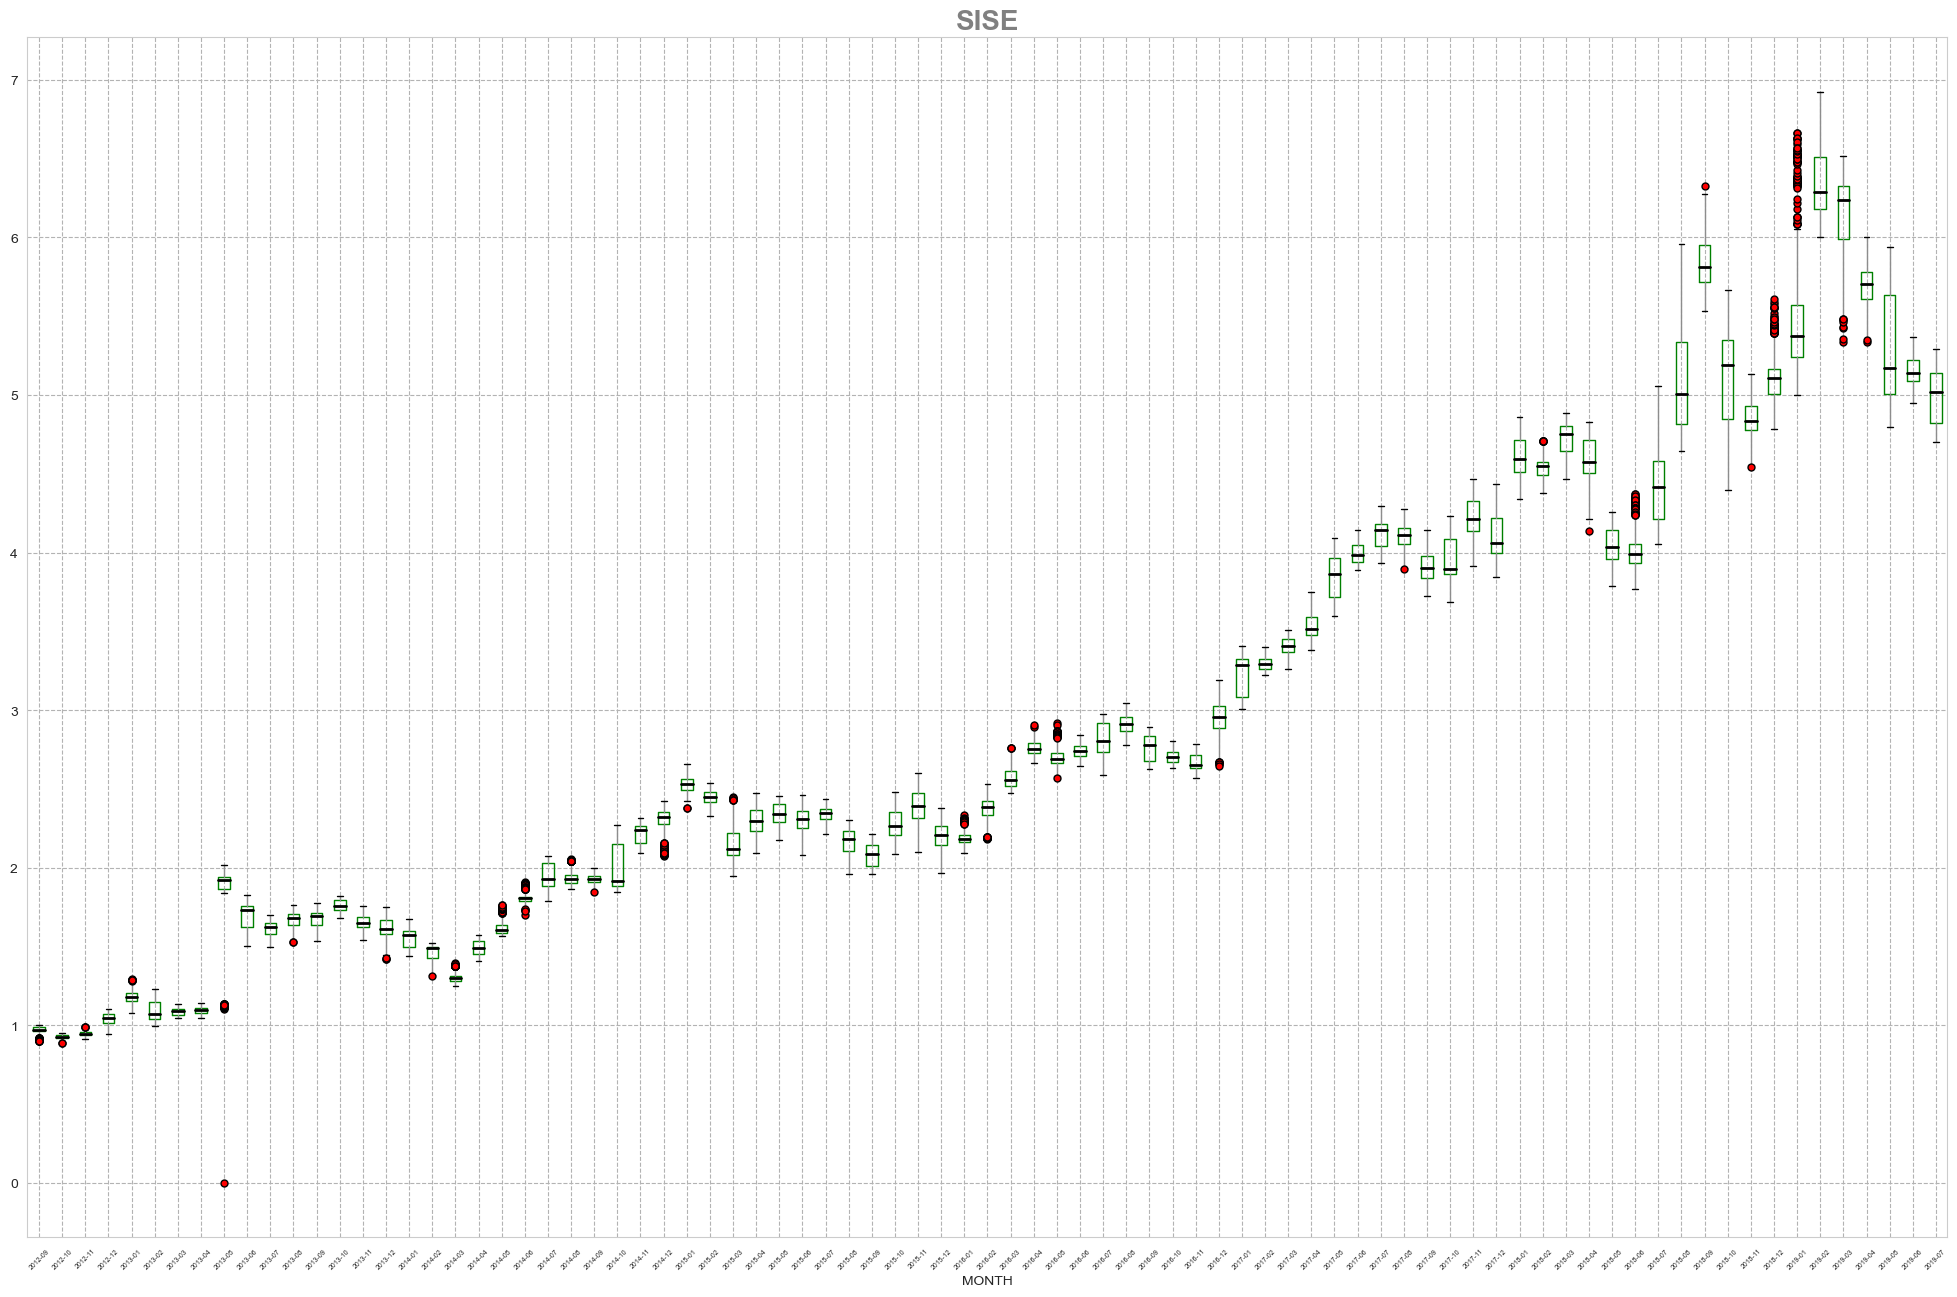

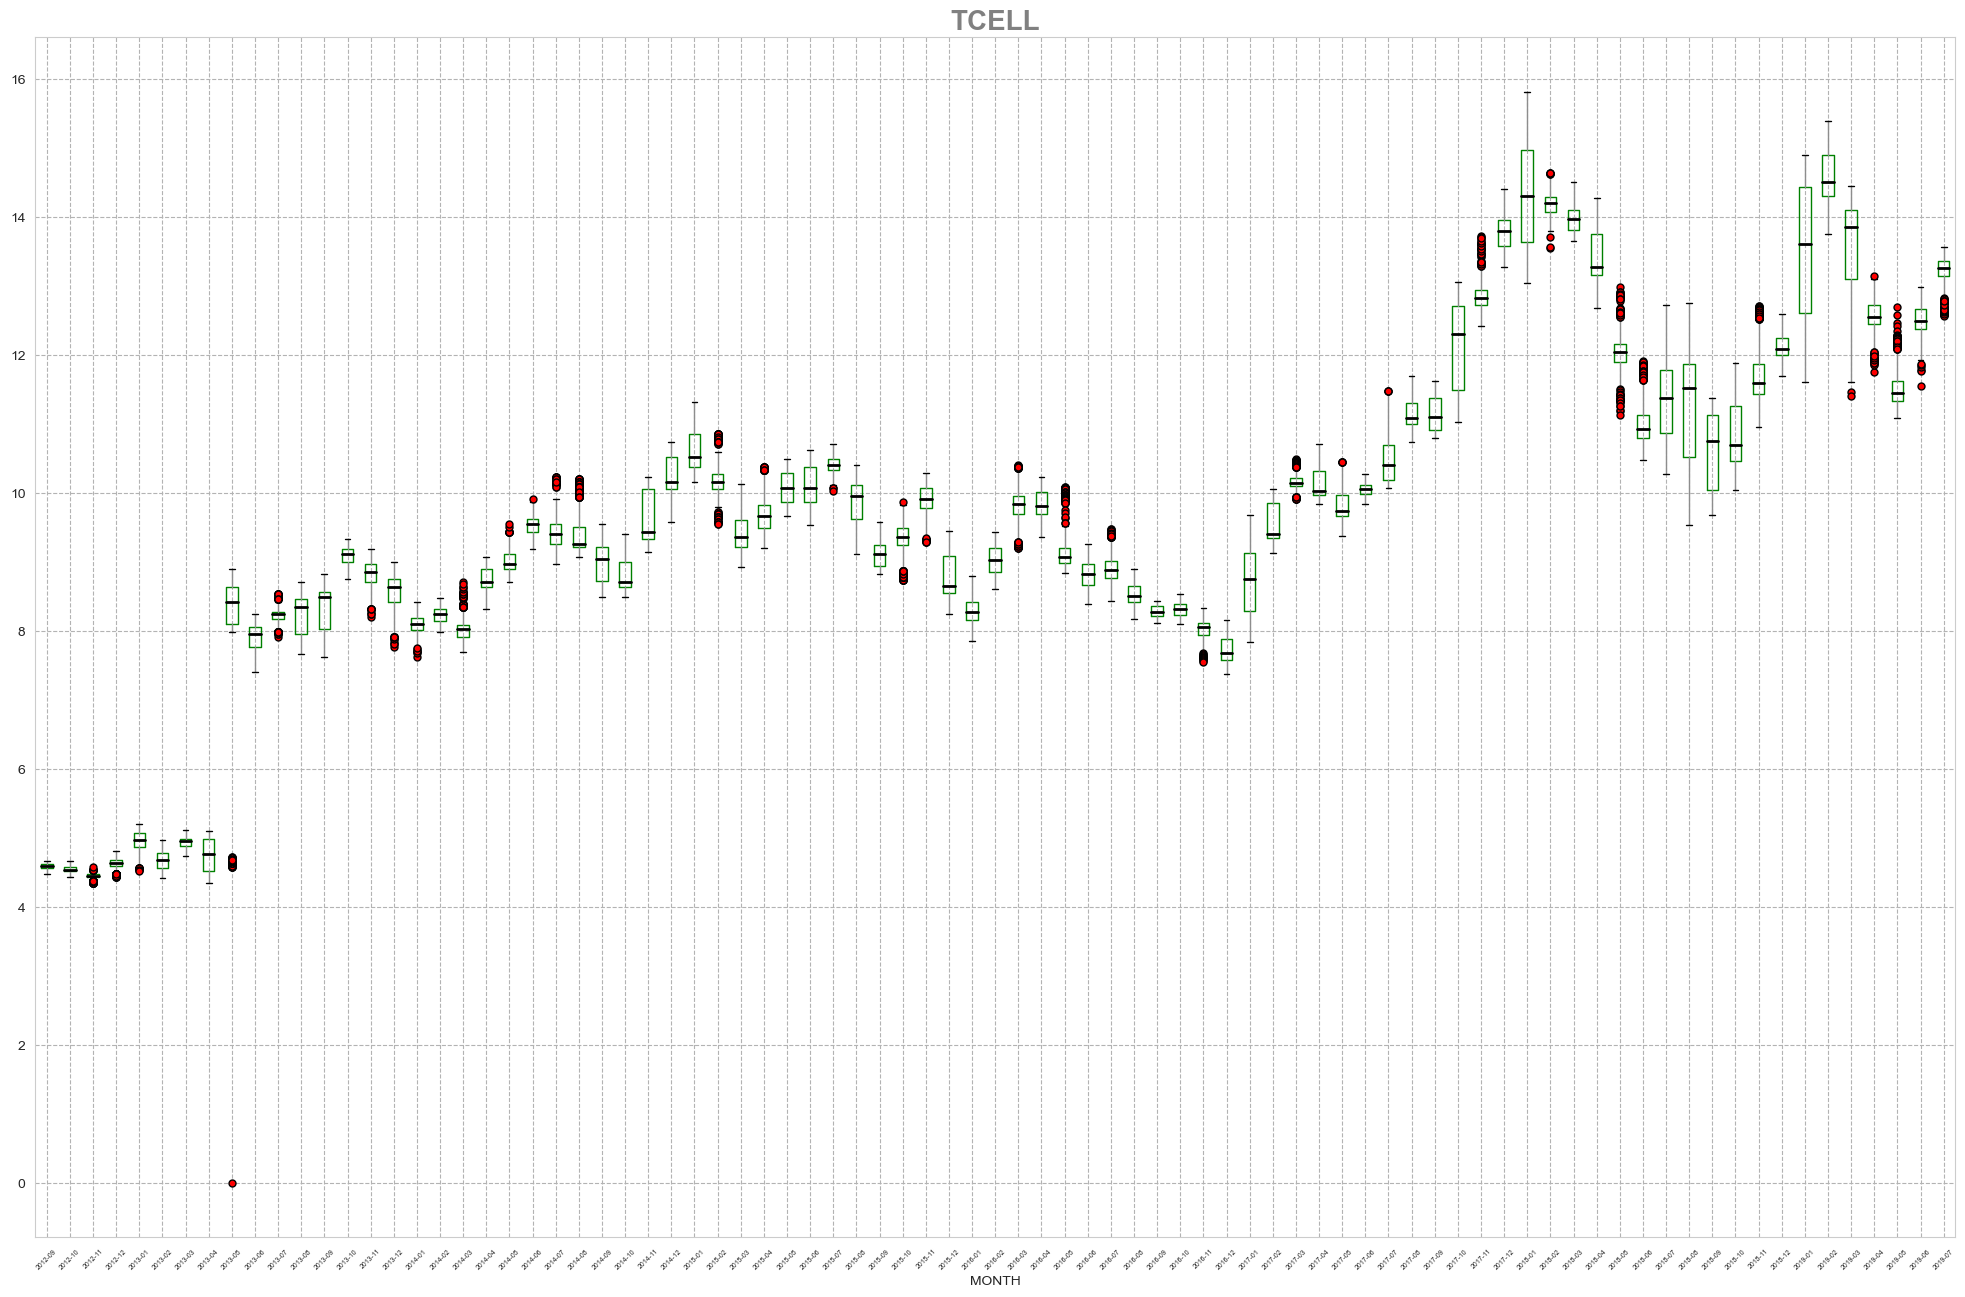

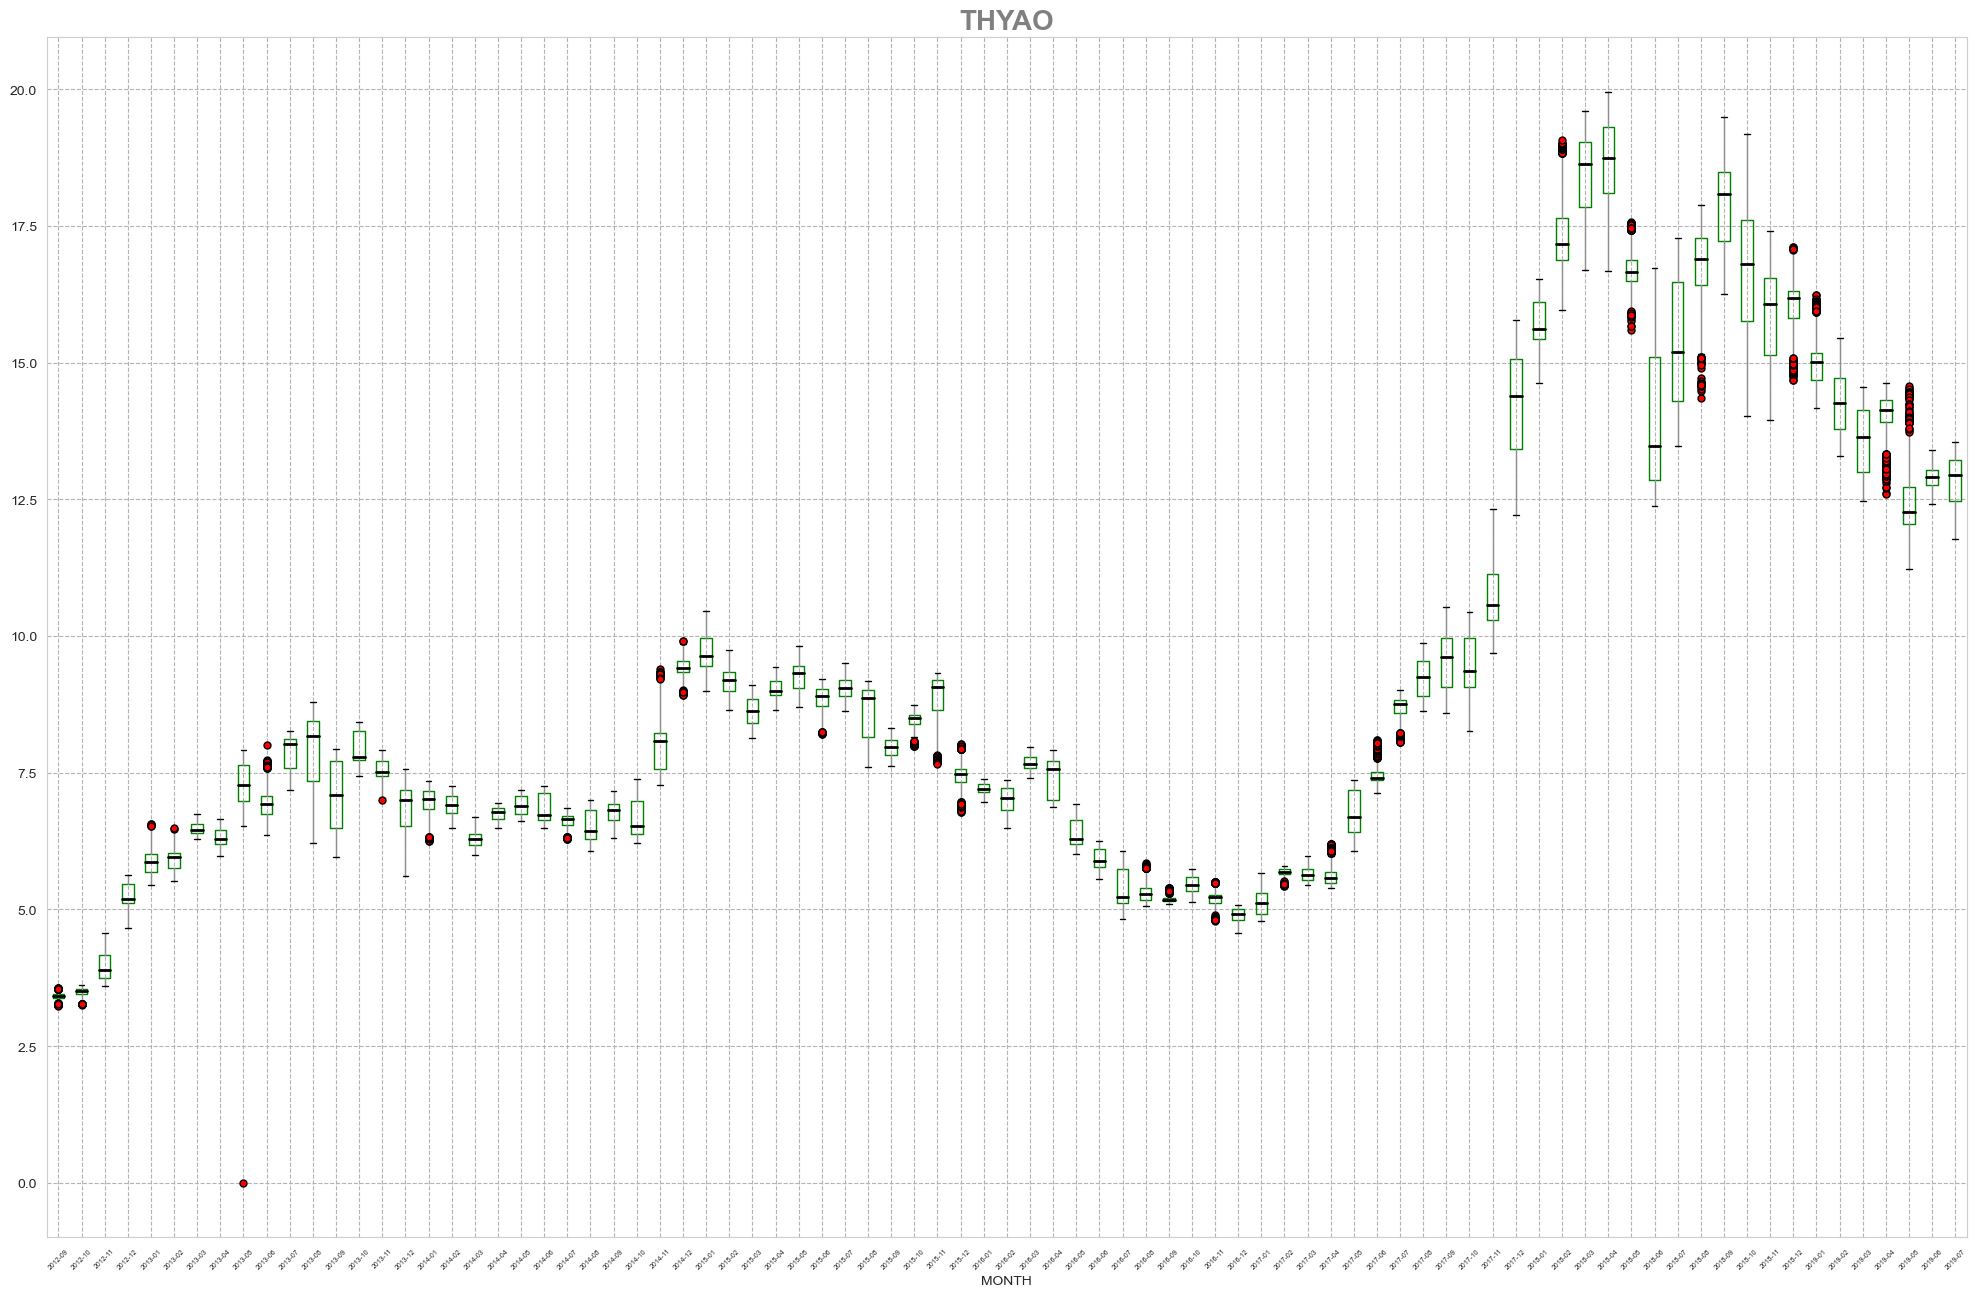

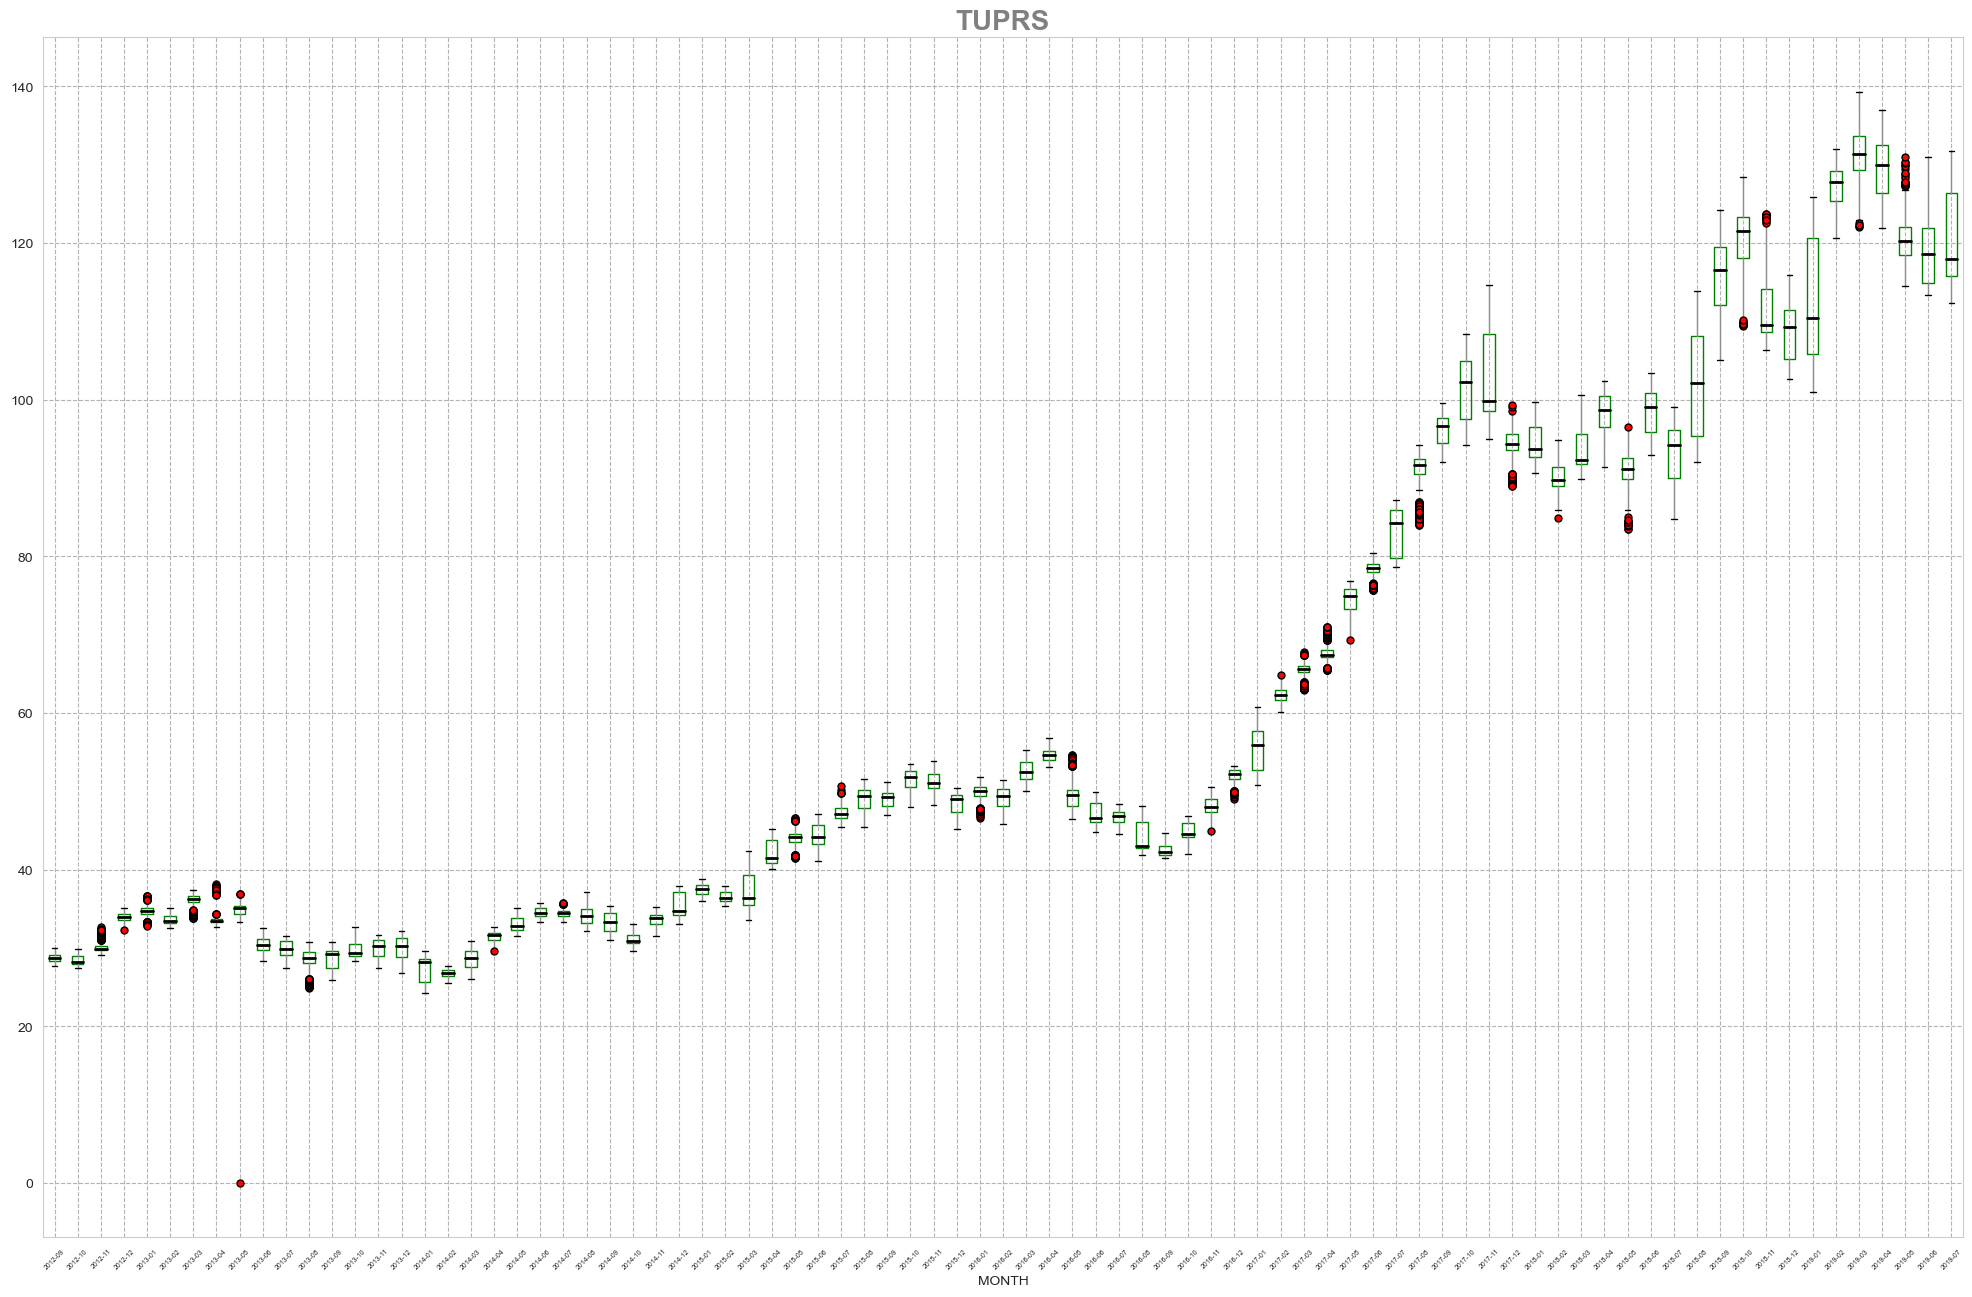

In [165]:
for stock in df_selected.columns[2:]:
    df_selected.boxplot(column=[stock], by='MONTH', figsize=(24,16), flierprops=dict(marker='o', markersize=5, markerfacecolor='red'), 
                        boxprops=dict(color='green'), medianprops=dict(color='black', linewidth=2))
    plt.title(stock, fontsize=20, fontweight='bold', color='gray')
    plt.suptitle('', fontsize=10, color='gray')
    plt.xticks(rotation=45, fontsize=5)
    plt.savefig(f'boxplot_{stock}.png')
    plt.show()

## Alternative 3 sigma rule application

In [166]:
for stock in df_selected.columns[2:]:
    # calculate the mean and standard deviance of each stock by month
    df_mean = df_selected.groupby('MONTH').mean()
    df_std = df_selected.groupby('MONTH').std()

In [167]:
# using df_mean and df_std, calculate outliers for each stock for each month using 3 sigma rule
for stock in df_selected.columns[2:]:
    for i in range(len(df_mean)):
        df_selected.loc[(df_selected['MONTH'] == df_mean.index[i]) & (df_selected[stock] > (df_mean[stock][i] + 3 * df_std[stock][i])), f'{stock}_outlier'] = df_selected[stock]
        df_selected.loc[(df_selected['MONTH'] == df_mean.index[i]) & (df_selected[stock] < (df_mean[stock][i] - 3 * df_std[stock][i])), f'{stock}_outlier'] = df_selected[stock]

In [168]:
df_selected

,timestamp,MONTH,AKBNK,ARCLK,BANVT,CCOLA,EREGL,MGROS,SISE,TCELL,...,AKBNK_outlier,ARCLK_outlier,BANVT_outlier,CCOLA_outlier,EREGL_outlier,MGROS_outlier,SISE_outlier,TCELL_outlier,THYAO_outlier,TUPRS_outlier
0,2012-09-17 06:45:00+00:00,2012-09,5.2084,6.9909,3.95,27.2590,0.7914,19.60,0.9932,4.5359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-17 07:00:00+00:00,2012-09,5.1938,6.9259,3.96,27.3471,0.7844,19.35,0.9897,4.5153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-17 07:15:00+00:00,2012-09,5.2084,6.9909,3.96,27.3471,0.7914,19.40,0.9932,4.5153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-09-17 07:30:00+00:00,2012-09,5.1938,6.9584,3.95,27.4347,0.7914,19.45,0.9897,4.5359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-17 07:45:00+00:00,2012-09,5.2084,6.9909,3.96,27.4347,0.7914,19.40,0.9970,4.5153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23 14:00:00+00:00,2019-07,7.7300,20.3000,16.04,33.8000,7.6900,15.27,NaN,13.4500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50008,2019-07-23 14:15:00+00:00,2019-07,7.7200,20.3200,15.89,33.5800,7.6500,15.28,NaN,13.4300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50009,2019-07-23 14:30:00+00:00,2019-07,7.7400,20.3400,15.95,33.8000,7.6700,15.26,NaN,13.4600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50010,2019-07-23 14:45:00+00:00,2019-07,7.7000,20.3800,16.03,33.5200,7.6700,15.25,NaN,13.4300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
# from df_selected, select columns except outlier columns
df_selected_trunk = df_selected[df_selected.columns[:12]]

# df_selected_trunk add after each stock column stock mean and stock std columns by month
for stock in df_selected_trunk.columns[2:]:
    df_selected_trunk[f'{stock}_mean'] = df_selected_trunk.groupby('MONTH')[stock].transform('mean')
    df_selected_trunk[f'{stock}_std'] = df_selected_trunk.groupby('MONTH')[stock].transform('std')


In [170]:
df_selected_trunk

,timestamp,MONTH,AKBNK,ARCLK,BANVT,CCOLA,EREGL,MGROS,SISE,TCELL,...,MGROS_mean,MGROS_std,SISE_mean,SISE_std,TCELL_mean,TCELL_std,THYAO_mean,THYAO_std,TUPRS_mean,TUPRS_std
0,2012-09-17 06:45:00+00:00,2012-09,5.2084,6.9909,3.95,27.2590,0.7914,19.60,0.9932,4.5359,...,19.18140,0.177680,0.966884,0.023925,4.591789,0.041143,3.414032,0.066771,28.739444,0.594057
1,2012-09-17 07:00:00+00:00,2012-09,5.1938,6.9259,3.96,27.3471,0.7844,19.35,0.9897,4.5153,...,19.18140,0.177680,0.966884,0.023925,4.591789,0.041143,3.414032,0.066771,28.739444,0.594057
2,2012-09-17 07:15:00+00:00,2012-09,5.2084,6.9909,3.96,27.3471,0.7914,19.40,0.9932,4.5153,...,19.18140,0.177680,0.966884,0.023925,4.591789,0.041143,3.414032,0.066771,28.739444,0.594057
3,2012-09-17 07:30:00+00:00,2012-09,5.1938,6.9584,3.95,27.4347,0.7914,19.45,0.9897,4.5359,...,19.18140,0.177680,0.966884,0.023925,4.591789,0.041143,3.414032,0.066771,28.739444,0.594057
4,2012-09-17 07:45:00+00:00,2012-09,5.2084,6.9909,3.96,27.4347,0.7914,19.40,0.9970,4.5153,...,19.18140,0.177680,0.966884,0.023925,4.591789,0.041143,3.414032,0.066771,28.739444,0.594057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23 14:00:00+00:00,2019-07,7.7300,20.3000,16.04,33.8000,7.6900,15.27,NaN,13.4500,...,14.34873,0.410798,5.003825,0.175338,13.199881,0.237585,12.847485,0.450240,121.141283,6.214055
50008,2019-07-23 14:15:00+00:00,2019-07,7.7200,20.3200,15.89,33.5800,7.6500,15.28,NaN,13.4300,...,14.34873,0.410798,5.003825,0.175338,13.199881,0.237585,12.847485,0.450240,121.141283,6.214055
50009,2019-07-23 14:30:00+00:00,2019-07,7.7400,20.3400,15.95,33.8000,7.6700,15.26,NaN,13.4600,...,14.34873,0.410798,5.003825,0.175338,13.199881,0.237585,12.847485,0.450240,121.141283,6.214055
50010,2019-07-23 14:45:00+00:00,2019-07,7.7000,20.3800,16.03,33.5200,7.6700,15.25,NaN,13.4300,...,14.34873,0.410798,5.003825,0.175338,13.199881,0.237585,12.847485,0.450240,121.141283,6.214055


### Alternative approach output files

In [171]:
stock_names = ['AKBNK', 'ARCLK', 'BANVT', 'CCOLA', 'EREGL', 'MGROS', 'SISE', 'TCELL', 'THYAO', 'TUPRS']
# only get YYYY-MM HH:MM from timestamp column from df_selected
df_selected['timestamp'] = df_selected['timestamp'].dt.strftime('%Y-%m-%d %H:%M')
# make it object so it can be saved as excel file
df_selected['timestamp'] = df_selected['timestamp'].astype(object)
for stock in stock_names:
    # give dynamic names to dataframes with stock names
    globals()[f'df_selected_{stock}'] = df_selected[[ 'MONTH', 'timestamp', f'{stock}_outlier']]
    # also add timestamp column as string to each dataframe
    

    # select rows where stock_outlier is not null
    globals()[f'df_selected_{stock}'] = globals()[f'df_selected_{stock}'][globals()[f'df_selected_{stock}'][f'{stock}_outlier'].notnull()]

    # add columns stock mean and stock std to each dataframe from df_selected_trunk
    globals()[f'df_selected_{stock}'][f'{stock}_mean'] = df_selected_trunk[f'{stock}_mean']
    globals()[f'df_selected_{stock}'][f'{stock}_std'] = df_selected_trunk[f'{stock}_std']

    print(globals()[f'df_selected_{stock}'])
    # save each dataframe as excel file
    globals()[f'df_selected_{stock}'].to_excel(f'{stock}_outliers.xlsx', index=False)
    

         MONTH         timestamp  AKBNK_outlier  AKBNK_mean  AKBNK_std
1339   2012-12  2012-12-03 08:00         6.0763    6.349386   0.088857
1342   2012-12  2012-12-03 08:45         6.0763    6.349386   0.088857
4159   2013-05  2013-05-06 16:45         0.0001    7.615530   0.456302
8354   2013-12  2013-12-27 12:00         4.6552    5.342319   0.225183
14879  2014-12  2014-12-16 14:45         6.0394    6.623721   0.190003
...        ...               ...            ...         ...        ...
44928  2018-12  2018-12-03 09:00         6.6402    5.823634   0.267765
44929  2018-12  2018-12-03 09:15         6.6488    5.823634   0.267765
44930  2018-12  2018-12-03 09:30         6.6574    5.823634   0.267765
44931  2018-12  2018-12-03 09:45         6.6488    5.823634   0.267765
44932  2018-12  2018-12-03 10:45         6.6317    5.823634   0.267765

[80 rows x 5 columns]
         MONTH         timestamp  ARCLK_outlier  ARCLK_mean  ARCLK_std
766    2012-11  2012-11-01 07:45         7.6738    7.0